# Idea #1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(15,7)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [2]:
# np.random.seed(200) #-- works for lin reg
np.random.seed(110)

# Data

In [3]:
data=pd.read_csv('DATA.csv')
data

,Sr. No.,FG,FG Position,Redox Potential,mol_filename_neutral,mol_filename_anion,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_methoxy,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_priamide,fr_sulfide
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,PHENAZINE_anion,4.515185,0.950185,4.515185,0.950185,...,0,0,0,0,0,4,0,0,0,0
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,2CH3N_R1_Anion,4.694722,0.939167,4.694722,0.939167,...,0,0,0,0,0,3,0,0,0,0
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,2CH3N_R2_Anion,4.631574,0.939167,4.631574,0.939167,...,0,0,0,0,0,2,0,0,0,0
3,3,NH2,1,-1.85,NH2_R1_neutral,NH2_R1_anion,5.844735,0.671994,5.844735,0.671994,...,0,0,0,0,0,3,0,0,0,0
4,4,NH2,2,-1.92,NH2_R2_neutral,NH2_R2_anion,5.700164,0.714890,5.700164,0.714890,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,NO2_R1267_anion,11.230655,-1.013112,11.230655,0.251483,...,0,0,4,4,0,0,0,0,0,0
181,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,NO2_R1469_anion,11.151935,-0.893097,11.151935,0.583057,...,0,0,4,4,4,0,0,0,0,0
182,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,NO2_R2378_anion,10.985181,-0.970500,10.985181,0.126897,...,0,0,4,4,0,0,0,0,0,0
183,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,NO2_R123469_anion,11.524990,-1.915802,11.524990,0.598243,...,0,0,6,6,2,0,0,0,0,0


In [4]:
data.describe()

,Redox Potential,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_methoxy,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_priamide,fr_sulfide
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,-1.418162,8.357724,0.017421,8.357724,0.334495,0.459133,251.739665,243.822778,251.563366,91.286486,...,0.021622,0.918919,0.427027,0.427027,0.194595,1.059459,0.502703,0.502703,0.010811,0.010811
std,0.680095,2.312979,0.749930,2.312979,0.276733,0.105647,47.312133,49.239681,47.301247,16.397544,...,0.145839,1.680747,1.218661,1.218661,0.638419,1.094318,1.319273,1.319273,0.103692,0.103692
min,-2.390000,4.515185,-4.419993,4.515185,0.000190,0.164131,180.210000,172.146000,180.068748,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.950000,5.893783,-0.305331,5.893783,0.111088,0.377663,225.207000,214.167000,225.053826,82.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.690000,9.197306,0.209964,9.197306,0.268600,0.447395,240.270000,228.174000,240.112344,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.820000,9.685346,0.485710,9.685346,0.496068,0.563308,270.204000,264.156000,270.038905,98.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,0.800000,13.411611,0.954259,13.411611,1.660140,0.644787,540.186000,540.186000,539.949374,194.000000,...,1.000000,8.000000,8.000000,8.000000,4.000000,4.000000,8.000000,8.000000,1.000000,1.000000


In [5]:
X=data.drop(columns=['Sr. No.','FG','FG Position','Redox Potential','mol_filename_neutral','mol_filename_anion'])
y=data['Redox Potential']
print(X.shape,y.shape)

(185, 134) (185,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 134) (129,)
(56, 134) (56,)


# Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Baseline Models

### 1. Linear Regression

R^2 = -1.998875798517492e+23


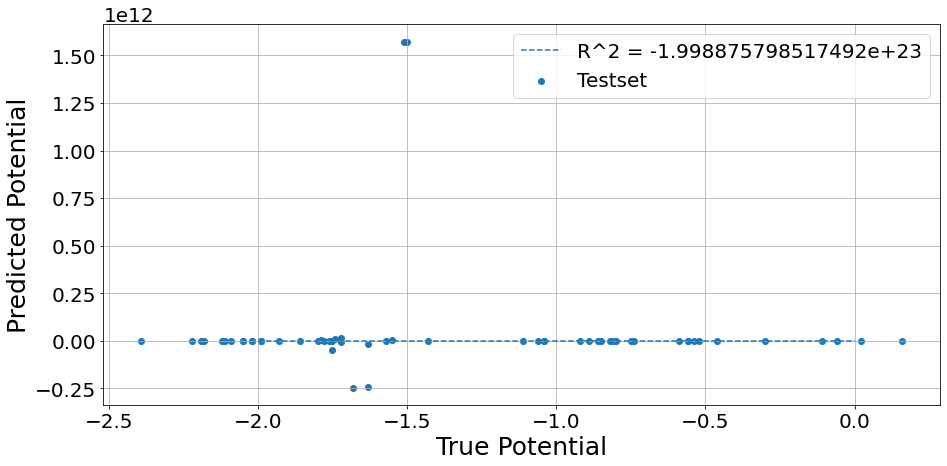

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_scaled, y_train)

y_pred=reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

### 2. SVR

R^2 = 0.897421986781374


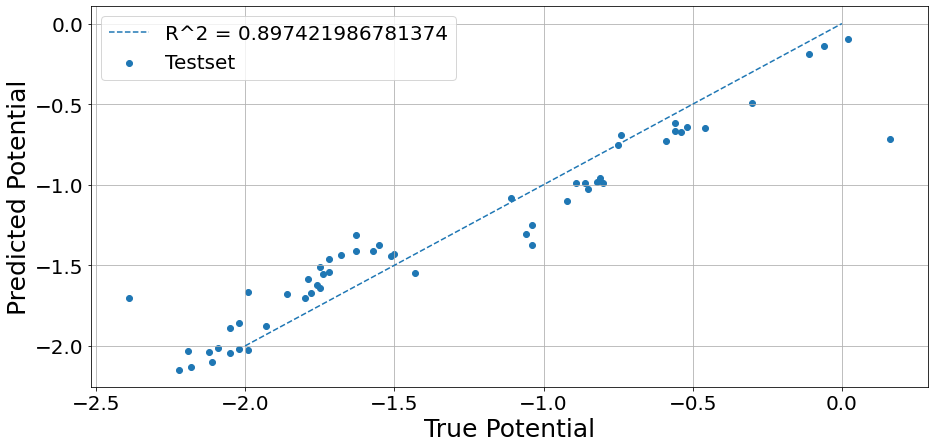

In [9]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train_scaled, y_train)

y_pred=svr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

### 3. Gradent Boosting Regression

R^2 = 0.9844464735601084


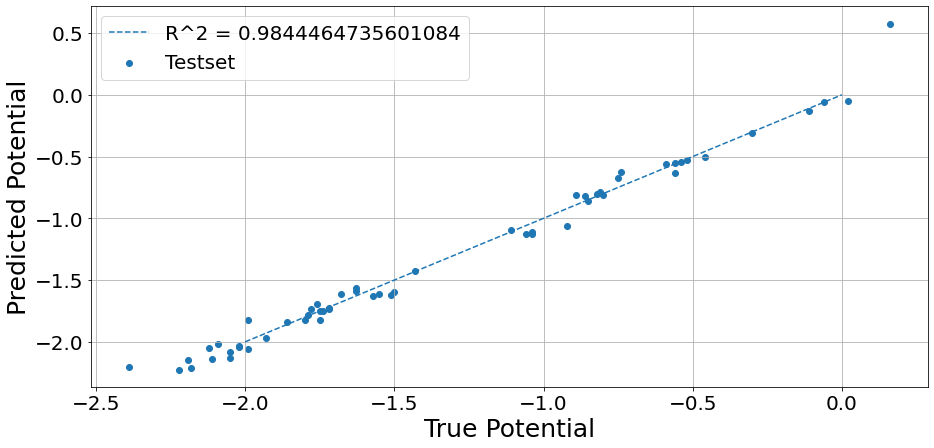

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train_scaled, y_train)

y_pred=gbr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

# Comparative Study - Multiple Models

## Performance on Testset

*******************
*


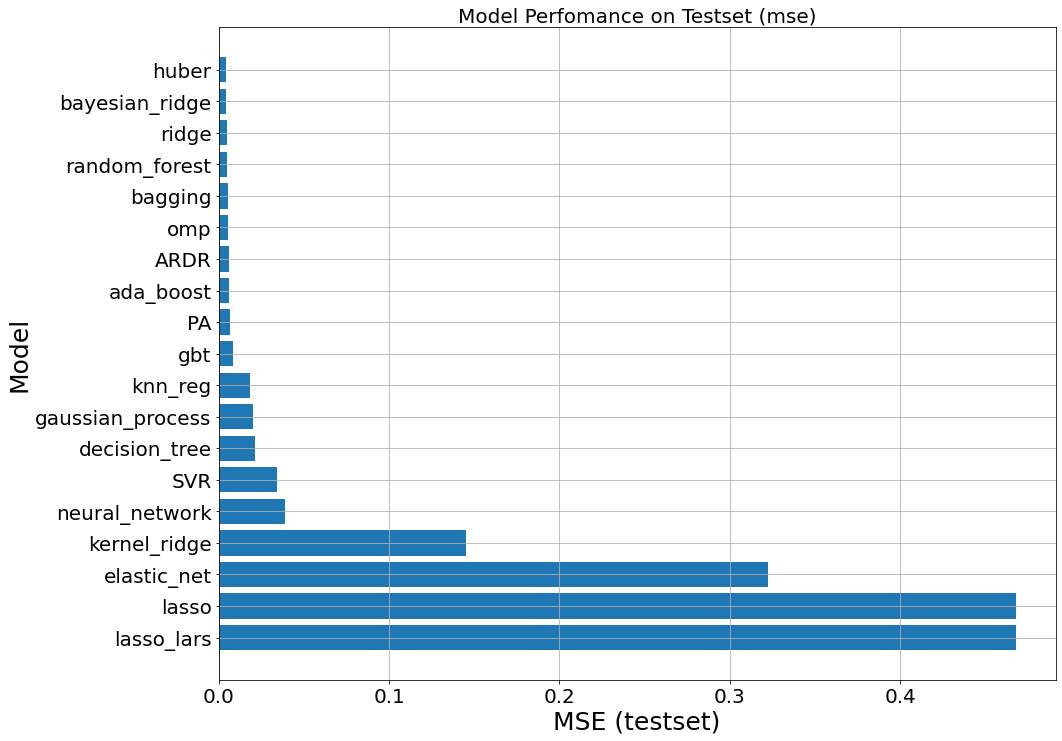

In [11]:
from sklearn.metrics import mean_squared_error

models_data={'model_name':[],'mse_testset':[]}

#Linear Regression
# from sklearn.linear_model import LinearRegression
# lr_reg = LinearRegression().fit(X_train_scaled, y_train)
# y_pred=lr_reg.predict(X_test_scaled)
# y_true=y_test
# mse_testset=mean_squared_error(y_true, y_pred)
# model_name='linear_regression'
# models_data['model_name'].append(model_name)
# models_data['mse_testset'].append(mse_testset)
# print('*',end='')

#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge().fit(X_train_scaled, y_train)
y_pred=ridge_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='ridge'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso().fit(X_train_scaled, y_train)
y_pred=lasso_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='lasso'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#MultiTaskLasso
# from sklearn.linear_model import MultiTaskLasso
# mtlasso_reg = MultiTaskLasso().fit(X_train_scaled, y_train)
# y_pred=mtlasso_reg.predict(X_test_scaled)
# y_true=y_test
# mse_testset=mean_squared_error(y_true, y_pred)
# model_name='multitask_lasso'
# models_data['model_name'].append(model_name)
# models_data['mse_testset'].append(mse_testset)
# print('*',end='')

#Elastic-Net
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet().fit(X_train_scaled, y_train)
y_pred=en_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='elastic_net'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#MultiTask-Elastic-Net
# from sklearn.linear_model import MultiTaskElasticNet
# mten_reg = MultiTaskElasticNet().fit(X_train_scaled, y_train)
# y_pred=mten_reg.predict(X_test_scaled)
# y_true=y_test
# mse_testset=mean_squared_error(y_true, y_pred)
# model_name='multitask_elastic_net'
# models_data['model_name'].append(model_name)
# models_data['mse_testset'].append(mse_testset)
# print('*',end='')

#Least-angle regression (LARS)
# from sklearn.linear_model import Lars
# lars_reg = Lars().fit(X_train_scaled, y_train)
# y_pred=lars_reg.predict(X_test_scaled)
# y_true=y_test
# mse_testset=mean_squared_error(y_true, y_pred)
# model_name='lars'
# models_data['model_name'].append(model_name)
# models_data['mse_testset'].append(mse_testset)
# print('*',end='')

#LassoLars
from sklearn.linear_model import LassoLars
lasso_lars_reg = LassoLars().fit(X_train_scaled, y_train)
y_pred=lasso_lars_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='lasso_lars'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit
omp_reg = OrthogonalMatchingPursuit().fit(X_train_scaled, y_train)
y_pred=omp_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='omp'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Bayesian Ridge regression
from sklearn.linear_model import BayesianRidge
br_reg = BayesianRidge().fit(X_train_scaled, y_train)
y_pred=br_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='bayesian_ridge'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#ARD Regression
from sklearn.linear_model import ARDRegression
ard_reg = ARDRegression().fit(X_train_scaled, y_train)
y_pred=ard_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='ARDR'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Passive Aggressive Regression
from sklearn.linear_model import PassiveAggressiveRegressor
pa_reg = PassiveAggressiveRegressor().fit(X_train_scaled, y_train)
y_pred=pa_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='PA'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#RANSAC Regression
# from sklearn.linear_model import RANSACRegressor
# ransac_reg = RANSACRegressor().fit(X_train_scaled, y_train)
# y_pred=ransac_reg.predict(X_test_scaled)
# y_true=y_test
# mse_testset=mean_squared_error(y_true, y_pred)
# model_name='RANSAC'
# models_data['model_name'].append(model_name)
# models_data['mse_testset'].append(mse_testset)
# print('*',end='')

#Huber Regression
from sklearn.linear_model import HuberRegressor
huber_reg = HuberRegressor(epsilon=1,\
                           alpha=1e-3,
                           tol=1e-6,
                           max_iter=50000).fit(X_train_scaled, y_train)
y_pred=huber_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='huber'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Polynomial regression: extending linear models with basis functions
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# poly_reg = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=True))]).fit(X_train_scaled, y_train)
# y_pred=poly_reg.predict(X_test_scaled)
# y_true=y_test
# mse_testset=mean_squared_error(y_true, y_pred)
# model_name='polynomial_features'
# models_data['model_name'].append(model_name)
# models_data['mse_testset'].append(mse_testset)
# print('*',end='')

#KernelRidge Regression
from sklearn.kernel_ridge import KernelRidge
kr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled, y_train)
y_pred=kr_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='kernel_ridge'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#SVR
from sklearn.svm import SVR
svr_reg = SVR().fit(X_train_scaled, y_train)
y_pred=svr_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='SVR'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Gaussian Process Regression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels \
import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
kernel = DotProduct() + WhiteKernel()
gp_reg = GaussianProcessRegressor(kernel=kernel).fit(X_train_scaled, y_train)
y_pred=gp_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='gaussian_process'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor().fit(X_train_scaled, y_train)
y_pred=dt_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='decision_tree'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Bagging meta-estimator
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor().fit(X_train_scaled, y_train)
y_pred=bag_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='bagging'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(X_train_scaled, y_train)
y_pred=rf_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='random_forest'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
adab_reg = AdaBoostRegressor().fit(X_train_scaled, y_train)
y_pred=adab_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='ada_boost'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Gradient Boosting Tree
from sklearn.ensemble import GradientBoostingRegressor
gb_reg=GradientBoostingRegressor().fit(X_train_scaled, y_train)
y_pred=gb_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='gbt'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Histogram-Based Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
hgb_reg=HistGradientBoostingRegressor().fit(X_train_scaled, y_train)
y_pred=hgb_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='gbt'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='')

#Neural Network
from sklearn.neural_network import MLPRegressor
nn_reg = MLPRegressor(hidden_layer_sizes=(50,20),\
                      max_iter=10000).fit(X_train_scaled, y_train)
y_pred=nn_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='neural_network'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='\n')

#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_reg = neigh = KNeighborsRegressor().fit(X_train_scaled, y_train)
y_pred=knn_reg.predict(X_test_scaled)
y_true=y_test
mse_testset=mean_squared_error(y_true, y_pred)
model_name='knn_reg'
models_data['model_name'].append(model_name)
models_data['mse_testset'].append(mse_testset)
print('*',end='\n')

df=pd.DataFrame.from_dict(models_data)
df=df.sort_values('mse_testset',ascending=False)
plt.figure(figsize=(15,12))
plt.barh(df['model_name'],df['mse_testset'])
plt.xlabel('MSE (testset)')
plt.ylabel('Model')
plt.title(f'Model Perfomance on Testset (mse)')
plt.show()

# Hyper-parameter Tuning (Model Optimization)

## Kernel Ridge Regression

R^2 = 0.6797511283397796
R^2 = 0.9921719898436576


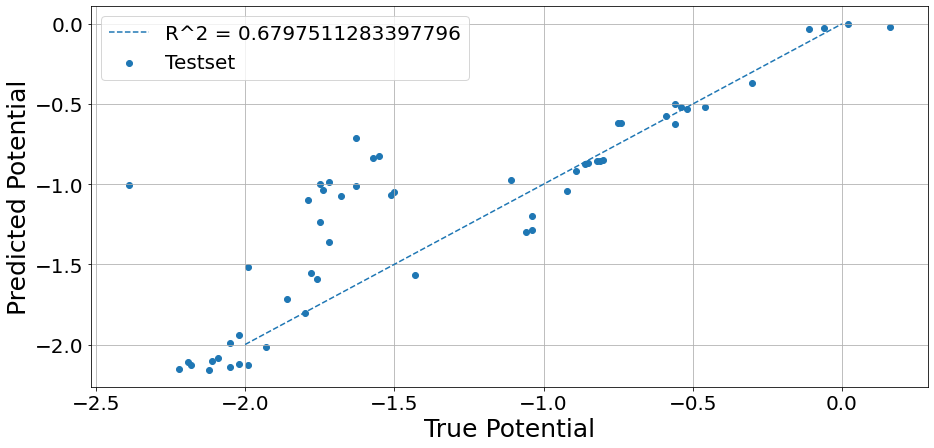

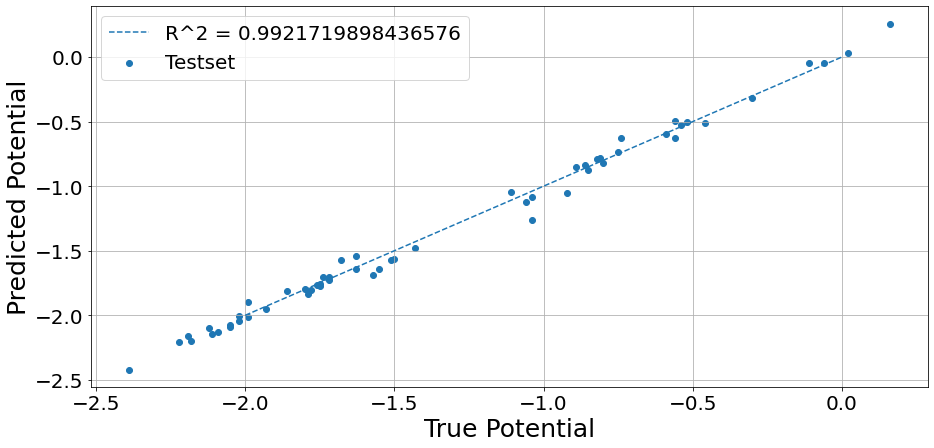

In [12]:
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

param_grid={'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
            'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
            'alpha':[0.01,0.1,1,5,10,100]}

scoring = ['r2','neg_mean_absolute_percentage_error']

estimator = KernelRidge()

gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,refit='r2',
                  return_train_score=True,
                  verbose=0)
gs.fit(X_train_scaled, y_train)
results = gs.cv_results_

plt.figure()
display.clear_output()
kr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled, y_train)
y_pred=kr_reg.predict(X_test_scaled)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

plt.figure()
y_pred=gs.predict(X_test_scaled)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()

# Feature Importance

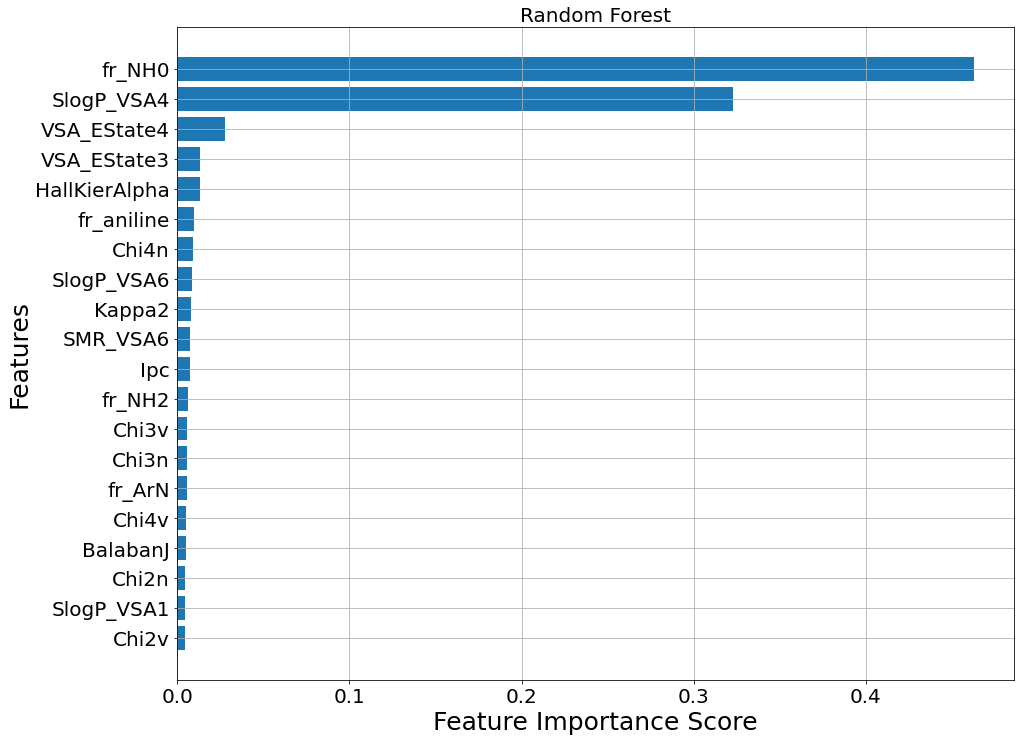

In [13]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor().fit(X_train_scaled, y_train)
importance = rf_reg.feature_importances_
ntop=20
sorted_idx=importance.argsort()
top_features=list(X.columns[sorted_idx][-ntop:])
plt.figure(figsize=(15,12))
plt.barh(top_features, importance[sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Random Forest')
plt.show()

## Feature Correlations

In [14]:
top_features.append('Redox Potential')

corr = data[top_features[::-1]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Redox Potential,fr_NH0,SlogP_VSA4,VSA_EState4,VSA_EState3,HallKierAlpha,fr_aniline,Chi4n,SlogP_VSA6,Kappa2,SMR_VSA6,Ipc,fr_NH2,Chi3v,Chi3n,fr_ArN,Chi4v,BalabanJ,Chi2n,SlogP_VSA1,Chi2v
Redox Potential,1.00,0.95,0.95,-0.72,0.77,-0.82,-0.62,0.74,-0.25,0.89,-0.64,0.28,-0.61,0.61,0.67,-0.61,0.68,0.39,0.61,-0.63,0.50
fr_NH0,0.95,1.00,1.00,-0.53,0.77,-0.92,-0.41,0.84,-0.43,0.93,-0.43,0.31,-0.41,0.70,0.79,-0.40,0.75,0.49,0.73,-0.42,0.59
SlogP_VSA4,0.95,1.00,1.00,-0.52,0.76,-0.91,-0.41,0.82,-0.43,0.91,-0.45,0.28,-0.41,0.69,0.78,-0.40,0.74,0.49,0.71,-0.42,0.57
VSA_EState4,-0.72,-0.53,-0.52,1.00,-0.67,0.34,0.96,-0.27,-0.17,-0.51,0.94,-0.23,0.96,-0.18,-0.16,0.96,-0.28,-0.06,-0.13,0.96,-0.15
VSA_EState3,0.77,0.77,0.76,-0.67,1.00,-0.81,-0.53,0.65,-0.57,0.76,-0.57,0.33,-0.53,0.54,0.63,-0.52,0.56,0.50,0.61,-0.55,0.47
HallKierAlpha,-0.82,-0.92,-0.91,0.34,-0.81,1.00,0.17,-0.91,0.67,-0.92,0.23,-0.38,0.17,-0.74,-0.91,0.16,-0.76,-0.57,-0.87,0.19,-0.64
fr_aniline,-0.62,-0.41,-0.41,0.96,-0.53,0.17,1.00,-0.09,-0.34,-0.34,0.97,-0.05,1.00,-0.02,0.02,1.00,-0.12,0.11,0.07,1.00,0.01
Chi4n,0.74,0.84,0.82,-0.27,0.65,-0.91,-0.09,1.00,-0.52,0.94,-0.10,0.45,-0.09,0.90,0.98,-0.09,0.92,0.48,0.96,-0.09,0.82
SlogP_VSA6,-0.25,-0.43,-0.43,-0.17,-0.57,0.67,-0.34,-0.52,1.00,-0.45,-0.28,-0.25,-0.34,-0.49,-0.61,-0.35,-0.42,-0.71,-0.62,-0.33,-0.45
Kappa2,0.89,0.93,0.91,-0.51,0.76,-0.92,-0.34,0.94,-0.45,1.00,-0.34,0.43,-0.34,0.86,0.91,-0.33,0.89,0.44,0.88,-0.34,0.78


<BarContainer object of 21 artists>

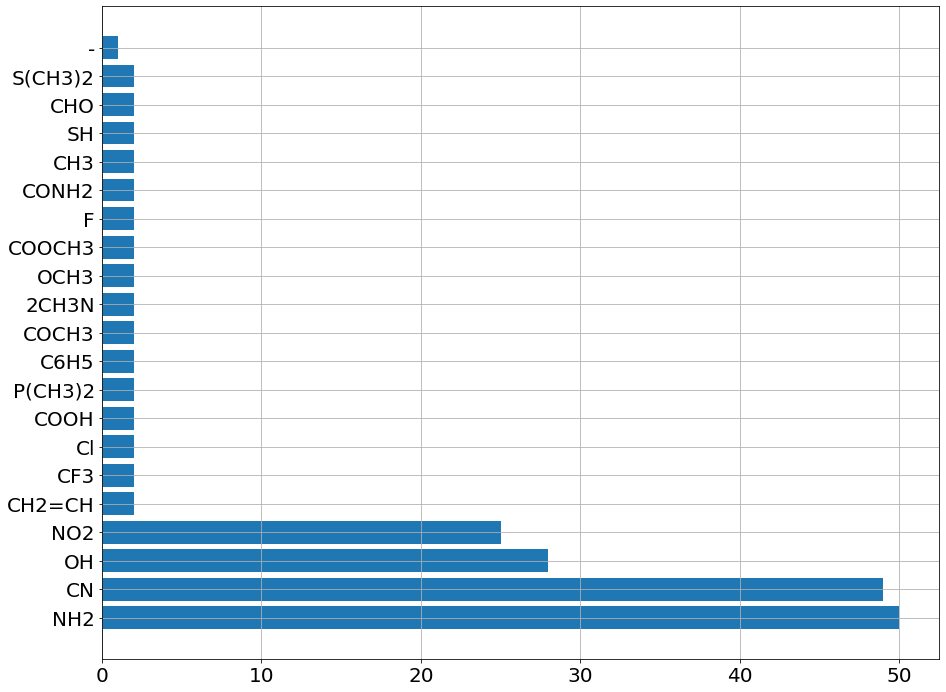

In [15]:
#seed=200
fg_dist=data['FG'].value_counts()
plt.figure(figsize=(15,12))
plt.barh(fg_dist.index,fg_dist)
# plt.xticks(rotation=90);

## Distribution of Train and Test Data wrt to FG

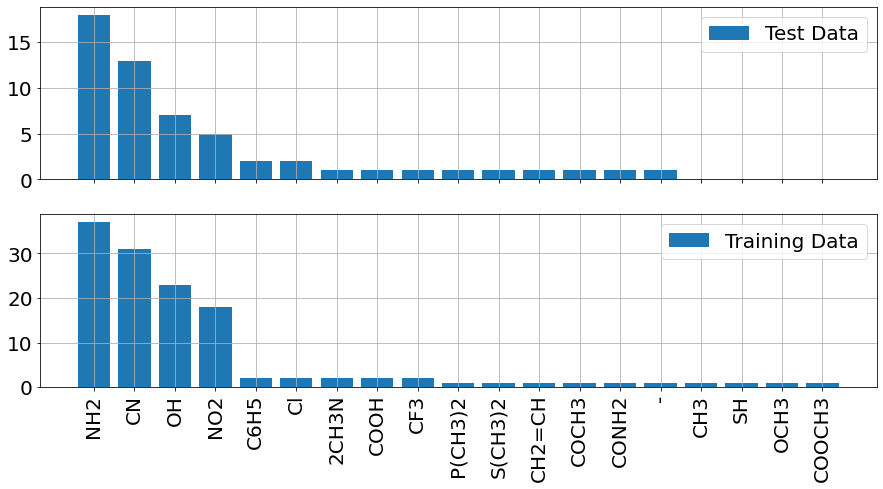

In [23]:
#seed=200
train_dist=data.iloc[X_train.index]['FG'].value_counts()
test_dist=data.iloc[X_test.index]['FG'].value_counts()
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)

ax1.bar(test_dist.index,test_dist,label='Test Data')
ax2.bar(train_dist.index,train_dist,label='Training Data')
plt.xticks(rotation=90)
ax1.legend()
ax2.legend()

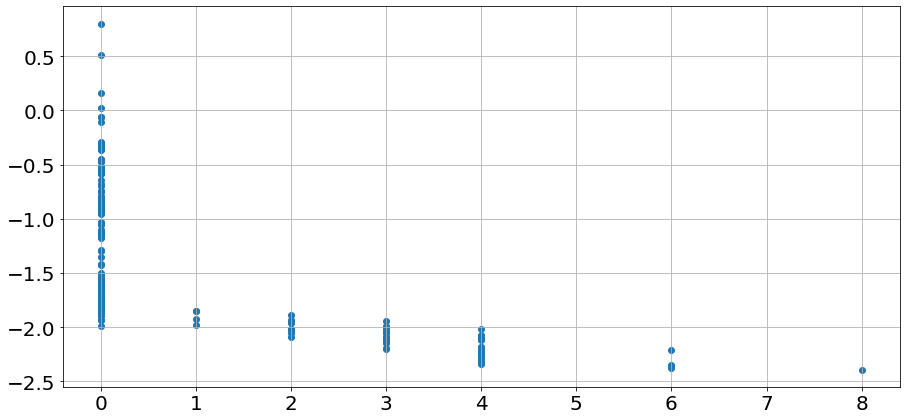

In [16]:
plt.scatter(X['fr_aniline'],y)

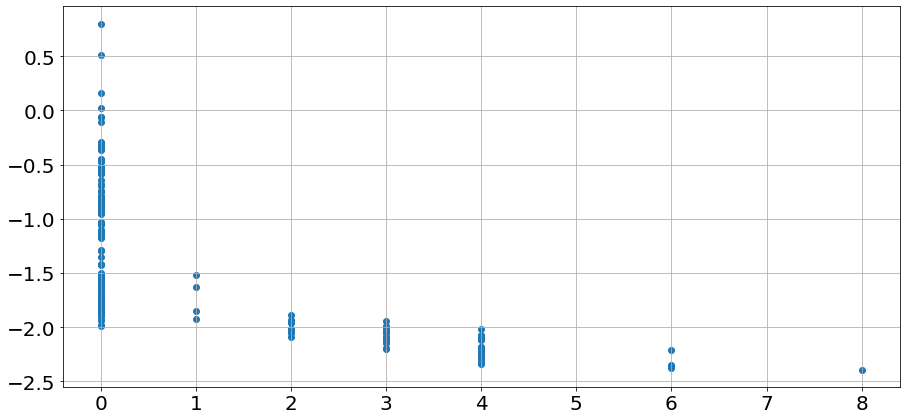

In [24]:
plt.scatter(X['fr_NH2'],y)

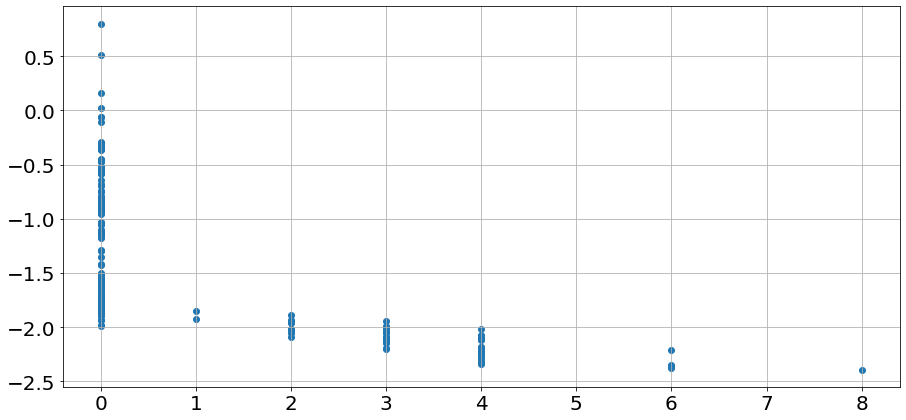

In [25]:
plt.scatter(X['fr_ArN'],y)

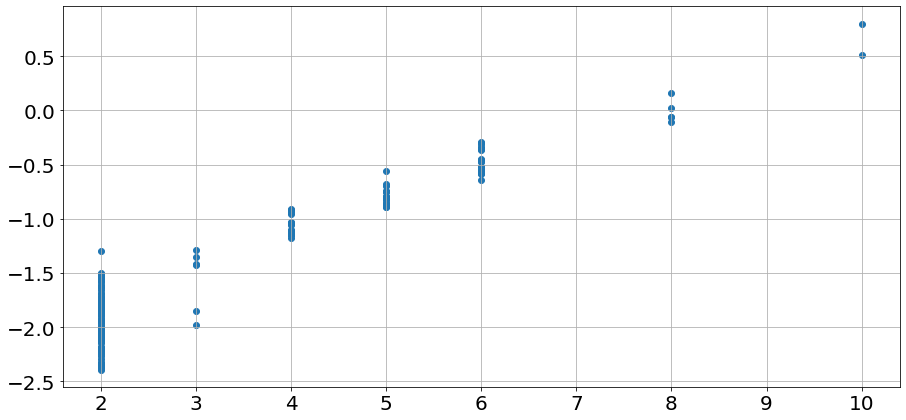

In [17]:
plt.scatter(X['fr_NH0'],y)

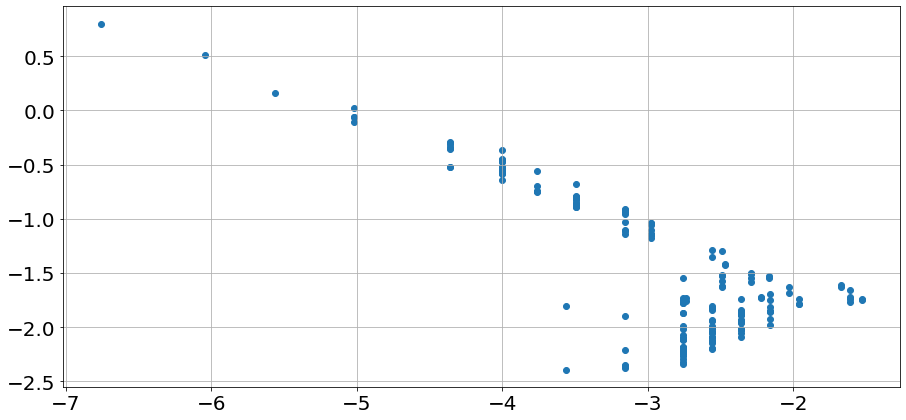

In [18]:
plt.scatter(X['HallKierAlpha'],y)

# Model Performance on Top 20 Features

R^2 = 0.9866439913469566


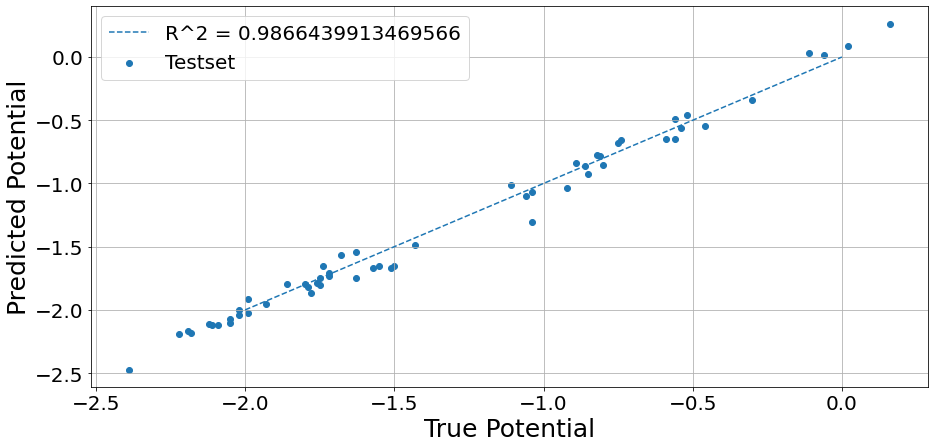

(129, 20) (56, 20)
R^2 = 0.9867552189017683


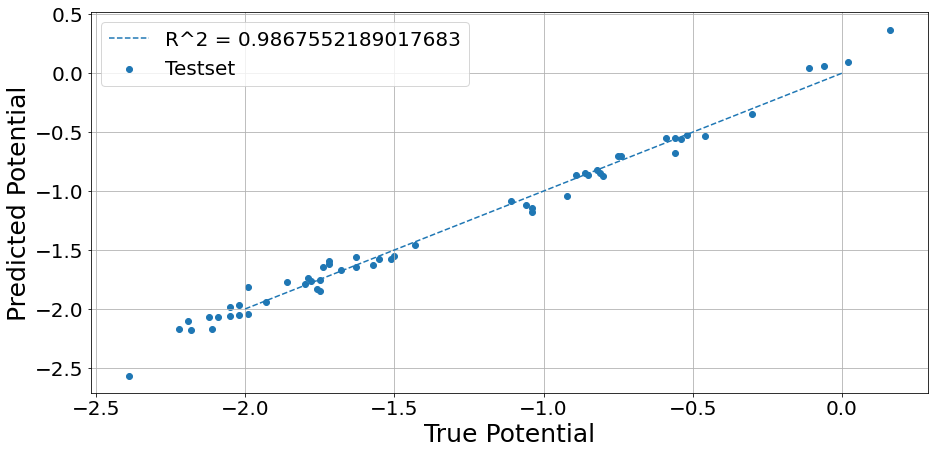

In [19]:
#ARD Regression
from sklearn.linear_model import ARDRegression
ard_reg = ARDRegression().fit(X_train_scaled, y_train)
y_pred=ard_reg.predict(X_test_scaled)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()
plt.show()

#ARD Regression
plt.figure()
from sklearn.linear_model import ARDRegression
ntop=20
_X_train,_X_test=X_train_scaled[:,sorted_idx[-ntop:]],X_test_scaled[:,sorted_idx[-ntop:]]
print(_X_train.shape,_X_test.shape)
ard_reg = ARDRegression().fit(_X_train, y_train)
y_pred=ard_reg.predict(_X_test)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label='Testset')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label=f'R^2 = {r2}')
plt.xlabel('True Potential')
plt.ylabel('Predicted Potential')
plt.legend()


# Features

* **SlogP_VSA(0-9)** - based on an approximate accessible van der Waals surface area (in Å2) and contribution to logP(o/w), summed over all atoms

* **fr_NH0** - Number of Tertiary amines

* **fr_NH2** - Number of Primary amines

* **fr_ArN** - Number of N functional groups attached to aromatics

* **VSA_EState(1-10)** - van der Waals surface area contributions calculated using EState indices

* **fr_aniline** - Number of anilines

* **HallKierAlpha** - ratio of covalent radii of atoms in a molecule wrt sp3 carbons

* **Chi(1/2)n** - Atomic connectivity index (order 1/2) in the hydrogen suppressed graph .This is calculated as the sum of 1/sqrt(didj) over all bonds between heavy atoms i and j where i < j. di (number of heavy neighbors)

* **Ipc** - information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrogen-suppressed graph of a molecule

* **Chi3v** - Atomic valence connectivity index (order 3). This is calculated as the sum of 1/sqrt(vivj) over all bonds between heavy atoms i and j where i < j. For a heavy atom i let vi = (pi - hi) / (Zi - pi - 1) where pi is the number of s and p valence electrons of atom i.

* **BertzCT** - A topological index meant to quantify "complexity" of molecules. Consists of a sum of two terms, one representing the complexity of the bonding, the other representing the complexity of the distribution of heteroatoms (from graph theory)

* **Kappa3** - Third kappa shape index: (n-1) (n-3)2 / p32 for odd n, and (n-3) (n-2)2 / p32 for even n. n denotes the number of atoms in the hydrogen suppressed graph. Also, let p2 denote the number of paths of length 2 and p3 the number of paths of length 3

* **PEOE_VSA9** - calculated using partial using partial charges and van der waals surface area contributions of atoms

* **labuteASA** - Water accessible surface area calculated using a radius of 1.4 A for the water molecule. A polyhedral representation is used for each atom in calculating the surface area.

* **SMR_VSA(0-7)** - based on an approximate accessible van der Waals surface area (in Å2) and contribution to Molar Refractivity, summed over all atoms

* **MinAbsPartialCharge** - self-explanatory

* **MaxAbsEStateIndex** - Maximum Absolute Electrotopological State index of molecule

* **balabanJ** - Balaban's connectivity topological index

### References: 
* http://www.cadaster.eu/sites/cadaster.eu/files/challenge/descr.htm, https://www.juit.ac.in/attachments/biomin/help.html

* http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors

* **Graph Descriptors** - https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/GraphDescriptors.py


**MOE** - MOE (Molecular Operating Environment) 2011 software were used to calculate about 300 molecular descriptors for each of these compounds

**SlogP_VSA** - 
 subdivision and classification of the molecular surface area according to atomic properties (such as contribution to logP, molar refractivity, and partial charge)
 
**SlogP** - Log of the octanol/water partition coefficient (including implicit hydrogens). This property is an atomic contribution model that calculates logP from the given structure; i.e., the correct protonation state (washed structures). Results may vary from the logP(o/w) descriptor. The training set for SlogP was ~7000 structures.For many years, the octanol−water partition coefficient (log P) has been used as a measure of lipophilicity

**SMR** - molar refractivity (MR), a common descriptor accounting for molecular size and polarizability

https://www.researchgate.net/figure/Molecular-descriptors-used-and-their-explanation-adapted-from-MOE-tutorial-Chemical_tbl1_225274017

**fr** - http://rdkit.org/docs/source/rdkit.Chem.Fragments.html

**E-statesindex** - Electrotopological State index for atoms in a molecule. Encode the topology and electronic environment of molecular fragments. This index combines both the electronic character and the topological environment of each skeletal atom in a molecule (https://pubs.acs.org/doi/pdf/10.1021/ci00001a012, https://www.researchgate.net/publication/224004106_Electrotopological_State_Atom_E-State_Index_in_Drug_Design_QSAR_Property_Prediction_and_Toxicity_Assessment, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6147309/)

**BertzCT** - https://pubs.acs.org/doi/pdf/10.1021/ja00402a071

**balabanJ** - https://www.sciencedirect.com/science/article/pii/0009261482800092


# List of All Descriptors Used in Training

In [20]:
list(X.columns)

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'SlogP_VSA8',